# Lab 7: Heart Attack 

## The Data

* Read in data
* Clean data
* Summarize data

In [16]:
import pandas as pd 
health = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\heart_attack.csv")
health.describe()

,age,sex,cp,trtbps,chol,restecg,thalach,output
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,54.347985,0.673993,0.974359,132.098901,246.860806,0.538462,149.446886,0.534799
std,9.163134,0.469611,1.030456,17.700358,52.569726,0.528059,23.240707,0.499704
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,1.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000


## Part One: Fitting Models

This section asks you to create a final best model for each of the model types studied this week. For each, you should:

Find the best model based on ROC AUC for predicting the target variable.

Report the (cross-validated!) ROC AUC metric.

Fit the final model.

Output a confusion matrix; that is, the counts of how many observations fell into each predicted class for each true class.

(Where applicable) Interpret the coefficients and/or estimates produced by the model fit.

You should certainly try multiple model pipelines to find the best model. You do not need to include the output for every attempted model, but you should describe all of the models explored. You should include any hyperparameter tuning steps in your writeup as well.

Q1: KNN
Q2: Logistic Regression
Q3: Decision Tree
Q4: Interpretation
Which predictors were most important to predicting heart attack risk?

Q5: ROC Curve
Plot the ROC Curve for your three models above.

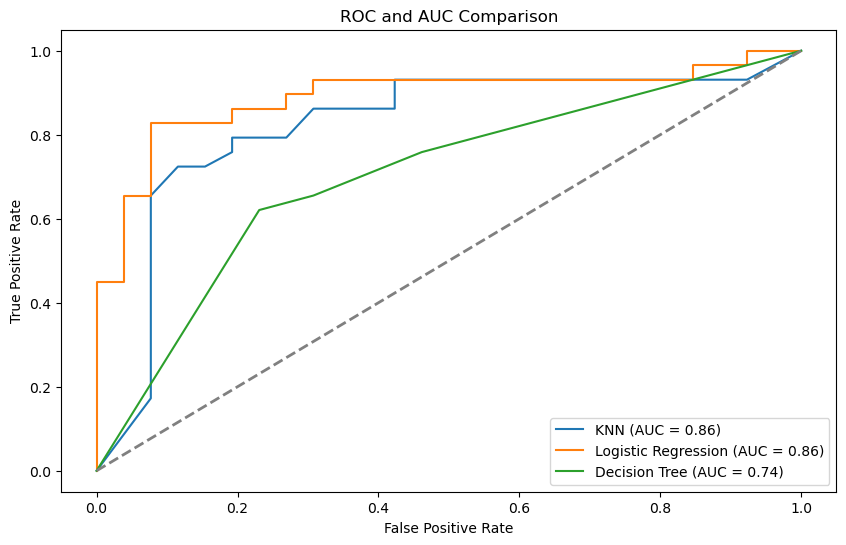


Logistic Regression Important Coefficients:
     Feature  Coefficient
6       cp_2     0.973836
4      sex_1    -0.897115
3    thalach     0.799143
5       cp_1     0.760338
7       cp_3     0.415595
1     trtbps    -0.368958
0        age    -0.223457
8  restecg_1     0.200903
2       chol    -0.167492
9  restecg_2    -0.066437

Decision Tree Important Coefficients:
     Feature  Importance
3    thalach    0.650342
0        age    0.196174
6       cp_2    0.153485
1     trtbps    0.000000
2       chol    0.000000
4      sex_1    0.000000
5       cp_1    0.000000
7       cp_3    0.000000
8  restecg_1    0.000000
9  restecg_2    0.000000


Logistic Regression Important Coefficients:
     Feature  Coefficient
6       cp_2     0.973836
4      sex_1    -0.897115
3    thalach     0.799143
5       cp_1     0.760338
7       cp_3     0.415595
1     trtbps    -0.368958
0        age    -0.223457
8  restecg_1     0.200903
2       chol    -0.167492
9  restecg_2    -0.066437

Decision Tree Importan

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# variables
health = pd.get_dummies(health, columns=['sex', 'cp', 'restecg', 'output'], drop_first=True)
X = health.drop("output_1", axis =1)
y = health["output_1"]

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1, stratify = y)

# knn model with hyperparameter tuning
knn = KNeighborsClassifier()
param_grid_knn = {"n_neighbors": range(1, 31)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 5, scoring = "roc_auc")
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train, y_train)
y_proba_knn = best_knn.predict_proba(X_test)[:,1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='roc_auc')
roc_auc_knn_cv = cv_scores_knn.mean()

# logistic regression model with hyperparameter tuning
log_reg = LogisticRegression(max_iter=1000, random_state=1)
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv = 5, scoring = "roc_auc")
grid_lr.fit(X_train, y_train)
best_log_reg = grid_lr.best_estimator_
best_log_reg.fit(X_train, y_train)
y_proba_lr = best_log_reg.predict_proba(X_test)[:,1]
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
cv_scores_lr = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='roc_auc')
roc_auc_lr_cv = cv_scores_lr.mean()

# decision tree with hyperparamter tuning
dtree = DecisionTreeClassifier(random_state=1)
param_grid_dt = {"max_depth": range(1, 11)}
grid_dt = GridSearchCV(dtree, param_grid_dt, cv = 5, scoring = "roc_auc")
grid_dt.fit(X_train, y_train)
best_dtree = grid_dt.best_estimator_
best_dtree.fit(X_train, y_train)
y_proba_dt = best_dtree.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
cv_scores_dt = cross_val_score(best_dtree, X_train, y_train, cv=5, scoring='roc_auc')
roc_auc_dt_cv = cv_scores_dt.mean()

# plotting roc curves
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, label = f"KNN (AUC = {roc_auc_knn_cv:.2f})")
plt.plot(fpr_lr, tpr_lr, label = f"Logistic Regression (AUC = {roc_auc_lr_cv:.2f})")
plt.plot(fpr_dt, tpr_dt, label = f"Decision Tree (AUC = {roc_auc_dt_cv:.2f})")
plt.plot([0,1], [0,1], color = "gray", lw = 2, linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC Comparison")
plt.legend(loc="lower right")
plt.show()

# coefficients for logistic regression
coefficients_lr = best_log_reg.coef_[0]
feature_importance_lr = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients_lr})
feature_importance_lr = feature_importance_lr.sort_values(by="Coefficient", key = abs, ascending = False)
print("\nLogistic Regression Important Coefficients:")
print(feature_importance_lr)

# coefficients for decision tree
feature_importance_dt = pd.DataFrame({"Feature": X.columns, "Importance": best_dtree.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by = "Importance", ascending = False)
print("\nDecision Tree Important Coefficients:")
print(feature_importance_dt)

Interpretation of coefficients: For the Logistic Regression Model, the most important factors in predicting heart attack risk is the maximum heart rate achieved during exercise, sex of the individual, and chest pain type 2. For the Decision Tree Model, the most important factors in predicting heart attack risk is maximum heart rate acheived during exercise, resting blood pressure, and age of the individual. 

In [18]:
# confusion matrices
# knn
y_pred_knn = best_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
# logistic regression
y_pred_lr = best_log_reg.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
# decision tree
y_pred_dt = best_dtree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
# function to display matrix for each model
def show_confusion_matrix(cm, model_name):
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    print(f"True Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

show_confusion_matrix(cm_knn, "KNN")
show_confusion_matrix(cm_lr, "Logistic Regression")
show_confusion_matrix(cm_dt, "Decision Tree")
best_k = grid_knn.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")


Confusion Matrix for KNN:
[[21  5]
 [ 6 23]]
True Negatives: 21
False Positives: 5
False Negatives: 6
True Positives: 23

Confusion Matrix for Logistic Regression:
[[19  7]
 [ 3 26]]
True Negatives: 19
False Positives: 7
False Negatives: 3
True Positives: 26

Confusion Matrix for Decision Tree:
[[14 12]
 [ 7 22]]
True Negatives: 14
False Positives: 12
False Negatives: 7
True Positives: 22
The best value of k is: 24


Confusion Matrix for KNN:
[[21  5]
 [ 6 23]]
True Negatives: 21
False Positives: 5
False Negatives: 6
True Positives: 23

Confusion Matrix for Logistic Regression:
[[19  7]
 [ 3 26]]
True Negatives: 19
False Positives: 7
False Negatives: 3
True Positives: 26

Confusion Matrix for Decision Tree:
[[14 12]
 [ 7 22]]
True Negatives: 14
False Positives: 12
False Negatives: 7
True Positives: 22
The best value of k is: 24


## Part Two: Metrics

Consider the following metrics:

True Positive Rate or Recall or Sensitivity = Of the observations that are truly Class A, how many were predicted to be Class A?

Precision or Positive Predictive Value = Of all the observations classified as Class A, how many of them were truly from Class A?

True Negative Rate or Specificity or Negative Predictive Value = Of all the observations classified as NOT Class A, how many were truly NOT Class A?

Compute each of these metrics (cross-validated) for your three models (KNN, Logistic Regression, and Decision Tree) in Part One.

In [19]:
from sklearn.metrics import make_scorer, recall_score, precision_score, confusion_matrix

# scorer function for cross validation
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return specificity

# creating custom scorers
recall_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score)
specificity_scorer = make_scorer(specificity_score)

# cross validation for knn
recall_knn = cross_val_score(best_knn, X_train, y_train, cv = 5, scoring = recall_scorer).mean()
precision_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring = precision_scorer).mean()
specificity_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring = specificity_scorer).mean()

# cross validation for logistic regression
recall_lr = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring= recall_scorer).mean()
precision_lr = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring=precision_scorer).mean()
specificity_lr = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring=specificity_scorer).mean()

# cross validation for decision tree
recall_dt = cross_val_score(best_dtree, X_train, y_train, cv=5, scoring=recall_scorer).mean()
precision_dt = cross_val_score(best_dtree, X_train, y_train, cv=5, scoring=precision_scorer).mean()
specificity_dt = cross_val_score(best_dtree, X_train, y_train, cv=5, scoring=specificity_scorer).mean()

print("Cross-Validated Metrics for kNN:")
print(f"Recall (Sensitivity): {recall_knn:.2f}")
print(f"Precision (Positive Predictive Value): {precision_knn:.2f}")
print(f"Specificity (True Negative Rate): {specificity_knn:.2f}")

print("\nCross-Validated Metrics for Logistic Regression:")
print(f"Recall (Sensitivity): {recall_lr:.2f}")
print(f"Precision (Positive Predictive Value): {precision_lr:.2f}")
print(f"Specificity (True Negative Rate): {specificity_lr:.2f}")

print("\nCross-Validated Metrics for Decision Tree:")
print(f"Recall (Sensitivity): {recall_dt:.2f}")
print(f"Precision (Positive Predictive Value): {precision_dt:.2f}")
print(f"Specificity (True Negative Rate): {specificity_dt:.2f}")

Cross-Validated Metrics for kNN:
Recall (Sensitivity): 0.65
Precision (Positive Predictive Value): 0.85
Specificity (True Negative Rate): 0.85

Cross-Validated Metrics for Logistic Regression:
Recall (Sensitivity): 0.79
Precision (Positive Predictive Value): 0.80
Specificity (True Negative Rate): 0.74

Cross-Validated Metrics for Decision Tree:
Recall (Sensitivity): 0.71
Precision (Positive Predictive Value): 0.74
Specificity (True Negative Rate): 0.67
Cross-Validated Metrics for kNN:
Recall (Sensitivity): 0.65
Precision (Positive Predictive Value): 0.85
Specificity (True Negative Rate): 0.85

Cross-Validated Metrics for Logistic Regression:
Recall (Sensitivity): 0.79
Precision (Positive Predictive Value): 0.80
Specificity (True Negative Rate): 0.74

Cross-Validated Metrics for Decision Tree:
Recall (Sensitivity): 0.71
Precision (Positive Predictive Value): 0.74
Specificity (True Negative Rate): 0.67


## Part Three: Discussion

Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.

Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.

Q1: The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

For this case, the metric that should be used is recall becuase it measures the proportion of patients at risk of a heart attack that are correctly identified. With a high recall value, this would ensure that the model catches as many true heart attack risks as possible. With us using the recall metric, the Logistic Regression model should be chosen because it has the highest recall value of 0.83. For future observations, we would expect the model to correctly identify 83% of patients that have heart attack risk. 

Q2: The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

For this case, the metric that should be chosen is precision because it measures the proportion of positive predictions that are true. This would eliminate giving bed spaces to those that are not at risk. With us using the precision metric, the Logistic Regression Model or the Decision Tree model could be chosen because they both have the highest precision value at 0.80. For future observations, we can expect that 80% of patients identified as at risk would be in need of monitoring. 

Q3: The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

For this case, it would be difficult to pick one metric to see what variables cause risk. We would look at the overall metrics for each model. Given that, we will select the Logisitc Regression model because its coefficients of the model would help indicate the impact of each variable on the possibilty of risk. For future observations, we can look at recall and precision which would indicate that 83% proportion of patients are correctly idenified as at risk and 80% of patients are correctly identified. 

Q4: The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

For this case, the matric that would be chosen is precision because is measures how many of the patients identified as at risk are truly at risk. With us using this metric, the Logistic Regression model or the Decision Tree model can be chosen becaus they both have the highest precision value of 0.80. For future observations, we can expect 80% of patients classified at at risk to be truly at risk which can be used as a benchmark for assess the accuracy of a new doctor's diagnoses. 

## Part Four: Validation

Before sharing the dataset with you, I set aside a random 10% of the observations to serve as a final validation set.

ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
Use each of your final models in Part One Q1-3, predict the target variable in the validation dataset.

For each, output a confusion matrix, and report the ROC AUC, the precision, and the recall.

Compare these values to the cross-validated estimates you reported in Part One and Part Two. Did our measure of model success turn out to be approximately correct for the validation data?

In [25]:
health2 = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\heart_attack_validation.csv")

In [26]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix

# variables
health2 = pd.get_dummies(health2, columns=['sex', 'cp', 'restecg', 'output'], drop_first=True)
X_val = health2.drop("output_1", axis=1)
y_val = health2["output_1"]

# standardize
X_val = X_val.reindex(columns=X.columns, fill_value=0)
X_val_scaled = scaler.transform(X_val)

# predictions for knn
y_pred_knn_val = best_knn.predict(X_val_scaled)
y_proba_knn_val = best_knn.predict_proba(X_val_scaled)[:, 1]
roc_auc_knn_val = roc_auc_score(y_val, y_proba_knn_val)
precision_knn_val = precision_score(y_val, y_pred_knn_val)
recall_knn_val = recall_score(y_val, y_pred_knn_val)
cm_knn_val = confusion_matrix(y_val, y_pred_knn_val)

print("\nValidation Metrics for kNN:")
print(f"ROC AUC: {roc_auc_knn_val:.2f}")
print(f"Precision: {precision_knn_val:.2f}")
print(f"Recall: {recall_knn_val:.2f}")
print(f"Confusion Matrix:\n{cm_knn_val}")

# predictions for logistic regression
y_pred_lr_val = best_log_reg.predict(X_val_scaled)
y_proba_lr_val = best_log_reg.predict_proba(X_val_scaled)[:,1]
roc_auc_lr_val = roc_auc_score(y_val, y_proba_lr_val)
precision_lr_val = precision_score(y_val, y_pred_lr_val)
recall_lr_val = recall_score(y_val, y_pred_lr_val)
cm_lr_val = confusion_matrix(y_val, y_pred_lr_val)

print("\nValidation Metrics for Logistic Regression:")
print(f"ROC AUC: {roc_auc_lr_val:.2f}")
print(f"Precision: {precision_lr_val:.2f}")
print(f"Recall: {recall_lr_val:.2f}")
print(f"Confusion Matrix:\n{cm_lr_val}")

# predictions for decision tree
y_pred_dt_val = best_dtree.predict(X_val_scaled)
y_proba_dt_val = best_dtree.predict_proba(X_val_scaled)[:,1]
roc_auc_dt_val = roc_auc_score(y_val, y_proba_dt_val)
precision_dt_val = precision_score(y_val, y_pred_dt_val)
recall_dt_val = recall_score(y_val, y_pred_dt_val)
cm_dt_val = confusion_matrix(y_val, y_pred_dt_val)

print("\nValidation Metrics for Decision Tree:")
print(f"ROC AUC: {roc_auc_dt_val:.2f}")
print(f"Precision: {precision_dt_val:.2f}")
print(f"Recall: {recall_dt_val:.2f}")
print(f"Confusion Matrix:\n{cm_dt_val}")



Validation Metrics for kNN:
ROC AUC: 0.88
Precision: 0.92
Recall: 0.58
Confusion Matrix:
[[10  1]
 [ 8 11]]

Validation Metrics for Logistic Regression:
ROC AUC: 0.90
Precision: 0.88
Recall: 0.74
Confusion Matrix:
[[ 9  2]
 [ 5 14]]

Validation Metrics for Decision Tree:
ROC AUC: 0.76
Precision: 0.76
Recall: 0.84
Confusion Matrix:
[[ 6  5]
 [ 3 16]]


Validation Metrics for kNN:
ROC AUC: 0.88
Precision: 0.92
Recall: 0.58
Confusion Matrix:
[[10  1]
 [ 8 11]]

Validation Metrics for Logistic Regression:
ROC AUC: 0.90
Precision: 0.88
Recall: 0.74
Confusion Matrix:
[[ 9  2]
 [ 5 14]]

Validation Metrics for Decision Tree:
ROC AUC: 0.76
Precision: 0.76
Recall: 0.84
Confusion Matrix:
[[ 6  5]
 [ 3 16]]


Discussion: For the kNN model, the values for the confusion matrix metrics perform better on the validation data than on the trianing and test data. AUC, precision, and recall are higher than in Part 1 and 2. For the Logistic Regression model, the values for the confusion matrix perform better on the validation data than on the testing and training data. AUC, precision, and recall are higher than in Part 1 and 2. For the Decision Tree model the values for AUC and precision within the confusion matrix perform better on the validation data than on the training and testing data; however, recall performs better on the training and testing data than on the validation data. 

# Part Five: Cohen's Kappa

Another common metric used in classification is Cohen’s Kappa.

Use online resources to research this measurement. Calculate it for the models from Part One, Q1-3, and discuss reasons or scenarios that would make us prefer to use this metric as our measure of model success. Do your conclusions from above change if you judge your models using Cohen’s Kappa instead? Does this make sense?

In [27]:
# cohen's kappa
from sklearn.metrics import cohen_kappa_score

#knn model
kappa_knn = cohen_kappa_score(y_val, y_pred_knn_val)

# logistic regression
kappa_lr = cohen_kappa_score(y_val, y_pred_lr_val)

# decision tree
kappa_dt = cohen_kappa_score(y_val, y_pred_dt_val)

print(f"Cohen's Kappa for kNN: {kappa_knn:.2f}")
print(f"Cohen's Kappa for Logistic Regression: {kappa_lr:.2f}")
print(f"Cohen's Kappa for Decision Tree: {kappa_dt:.2f}")

# reference used: https://www.statology.org/cohens-kappa-python/

Cohen's Kappa for kNN: 0.43
Cohen's Kappa for Logistic Regression: 0.52
Cohen's Kappa for Decision Tree: 0.40
Cohen's Kappa for kNN: 0.43
Cohen's Kappa for Logistic Regression: 0.52
Cohen's Kappa for Decision Tree: 0.40


The value for kNN is moderate agreement. The value for Logistic Regression is substantial agreement. The value for Decision Tress is moderate agreement. 
Cohen’s Kappa is a measure of the agreement between predicted and actual classifications, taking into account the possibility of the agreement occurring by chance. We can use this metric when there are class imbalances, when we are comparing multiple different models with similar metrics or to ensure that there is a consistency in model predictions. The value for the kNN model and the Logistic Regression model aligns with our previous results using other metrics. The Decision Tree model value is lower than the other metrics which were previously used which can represent unreliable predictions. This can be shown in the low recall value for the Decision Tree model. This makes sense because Cohen's Kappa adjusts for random agreement which ensures that there are not any biases or overfitting. 

## Appendix and References

https://www.statology.org/cohens-kappa-python/

https://towardsdatascience.com/cohens-kappa-what-it-is-when-to-use-it-and-how-to-avoid-its-pitfalls-e42447962bbc

Generative A.I. Statement: Chat-GPT was used to suggest changes in code to debug errors. An example of errors include, incorrect syntax, incorrect usage of parameters for plots, making suggestions to fix parameters to resolve the error in code. Chat-GPT was only used to resolve errors in already hand written code. 